In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV

from math import ceil
import warnings

# Exploratory Data Analysis

### Data collection

In [45]:
# Your code here

URL = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
raw_df = pd.read_csv(URL, sep=';')

## Data oveview

In [46]:
raw_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [47]:
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [44]:
print(f'The data has {raw_df.duplicated().sum()} duplicated rows')
for column, series in raw_df.items():
    print(f'{column:15} has {series.isnull().sum()} null values')


The data has 12 duplicated rows
age             has 0 null values
job             has 0 null values
marital         has 0 null values
education       has 0 null values
default         has 0 null values
housing         has 0 null values
loan            has 0 null values
contact         has 0 null values
month           has 0 null values
day_of_week     has 0 null values
duration        has 0 null values
campaign        has 0 null values
pdays           has 0 null values
previous        has 0 null values
poutcome        has 0 null values
emp.var.rate    has 0 null values
cons.price.idx  has 0 null values
cons.conf.idx   has 0 null values
euribor3m       has 0 null values
nr.employed     has 0 null values
y               has 0 null values


### Overview analysis

We can see from the data that there are no null values and the dataset contains a few duplicates.

Here is what each column represents: 

| Variable Name    | Type        | Description                                                                 |
| :--------------- | :---------- | :-------------------------------------------------------------------------- |
| `age`            | Numeric     | Age of customer                                                             |
| `job`            | Categorical | Type of job                                                                 |
| `marital`        | Categorical | Marital status                                                              |
| `education`      | Categorical | Level of education                                                          |
| `default`        | Categorical | Do you currently have credit                                                |
| `housing`        | Categorical | Do you have a housing loan                                                  |
| `loan`           | Categorical | Do you have a personal loan?                                                |
| `contact`        | Categorical | Type of contact communication                                               |
| `month`          | Categorical | Last month in which you have been contacted                                 |
| `day_of_week`    | Categorical | Last day on which you have been contacted                                   |
| `duration`       | Numeric     | Duration of previous contact in seconds                                     |
| `campaign`       | Numeric     | Number of contacts made during this campaign to the customer                |
| `pdays`          | Numeric     | Number of days that elapsed since the last campaign until the customer was contacted |
| `previous`       | Numeric     | Number of contacts made during the previous campaign to the customer        |
| `poutcome`       | Categorical | Result of the previous marketing campaign                                   |
| `emp.var.rate`   | Numeric     | Employment variation rate. Quarterly indicator                              |
| `cons.price.idx` | Numeric     | Consumer price index. Monthly indicator                                     |
| `cons.conf.idx`  | Numeric     | Consumer confidence index. Monthly indicator                                |
| `euribor3m`      | Numeric     | EURIBOR 3-month rate. Daily indicator                                       |
| `nr.employed`    | Numeric     | Number of employees. Quarterly indicator                                    |
| `y`              | Categorical | **TARGET:** Whether the customer takes out a long-term deposit or not       |

## Data cleaning

This dataset comes pretty clean actually, it doesn't seem like we have wrong data, so the only thing we need to do in this step is drop the duplicates.

In [29]:
df = raw_df.copy()
df.drop_duplicates(ignore_index=True,inplace=True)

## Categorical to numerical transformation

Here we will standardize the data to have numerical values for every column.

In [30]:


num_continuous = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
num_discrete = ['age', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']

for column in df.columns:
    if   column in (num_continuous):
        df[column] = df[column].astype('float32')
    elif column in (num_discrete):
        df[column] = df[column].astype('int32')

cat_num = {column: pd.factorize(df[column])[0] for column in categorical}
df[categorical] = pd.DataFrame(cat_num)



In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int32  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int32  
 11  campaign        41176 non-null  int32  
 12  pdays           41176 non-null  int32  
 13  previous        41176 non-null  int32  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float32
 16  cons.price.idx  41176 non-null  float32
 17  cons.conf.idx   41176 non-null 

## Data exploration

In the next plots we will see if there are any obvious relations between the variables

### univariate and multivariate analysis
Over the next figures we will represent the univariate analysis plots over the diagonal and the rest of the plots on each figure correspond to the multivariate analysis.

#### **Figure 1.**
First, we will compare the categorical variables. each point represents a client of the bank and its color indicates if the client took out a long-term deposit (orange) or not (blue)

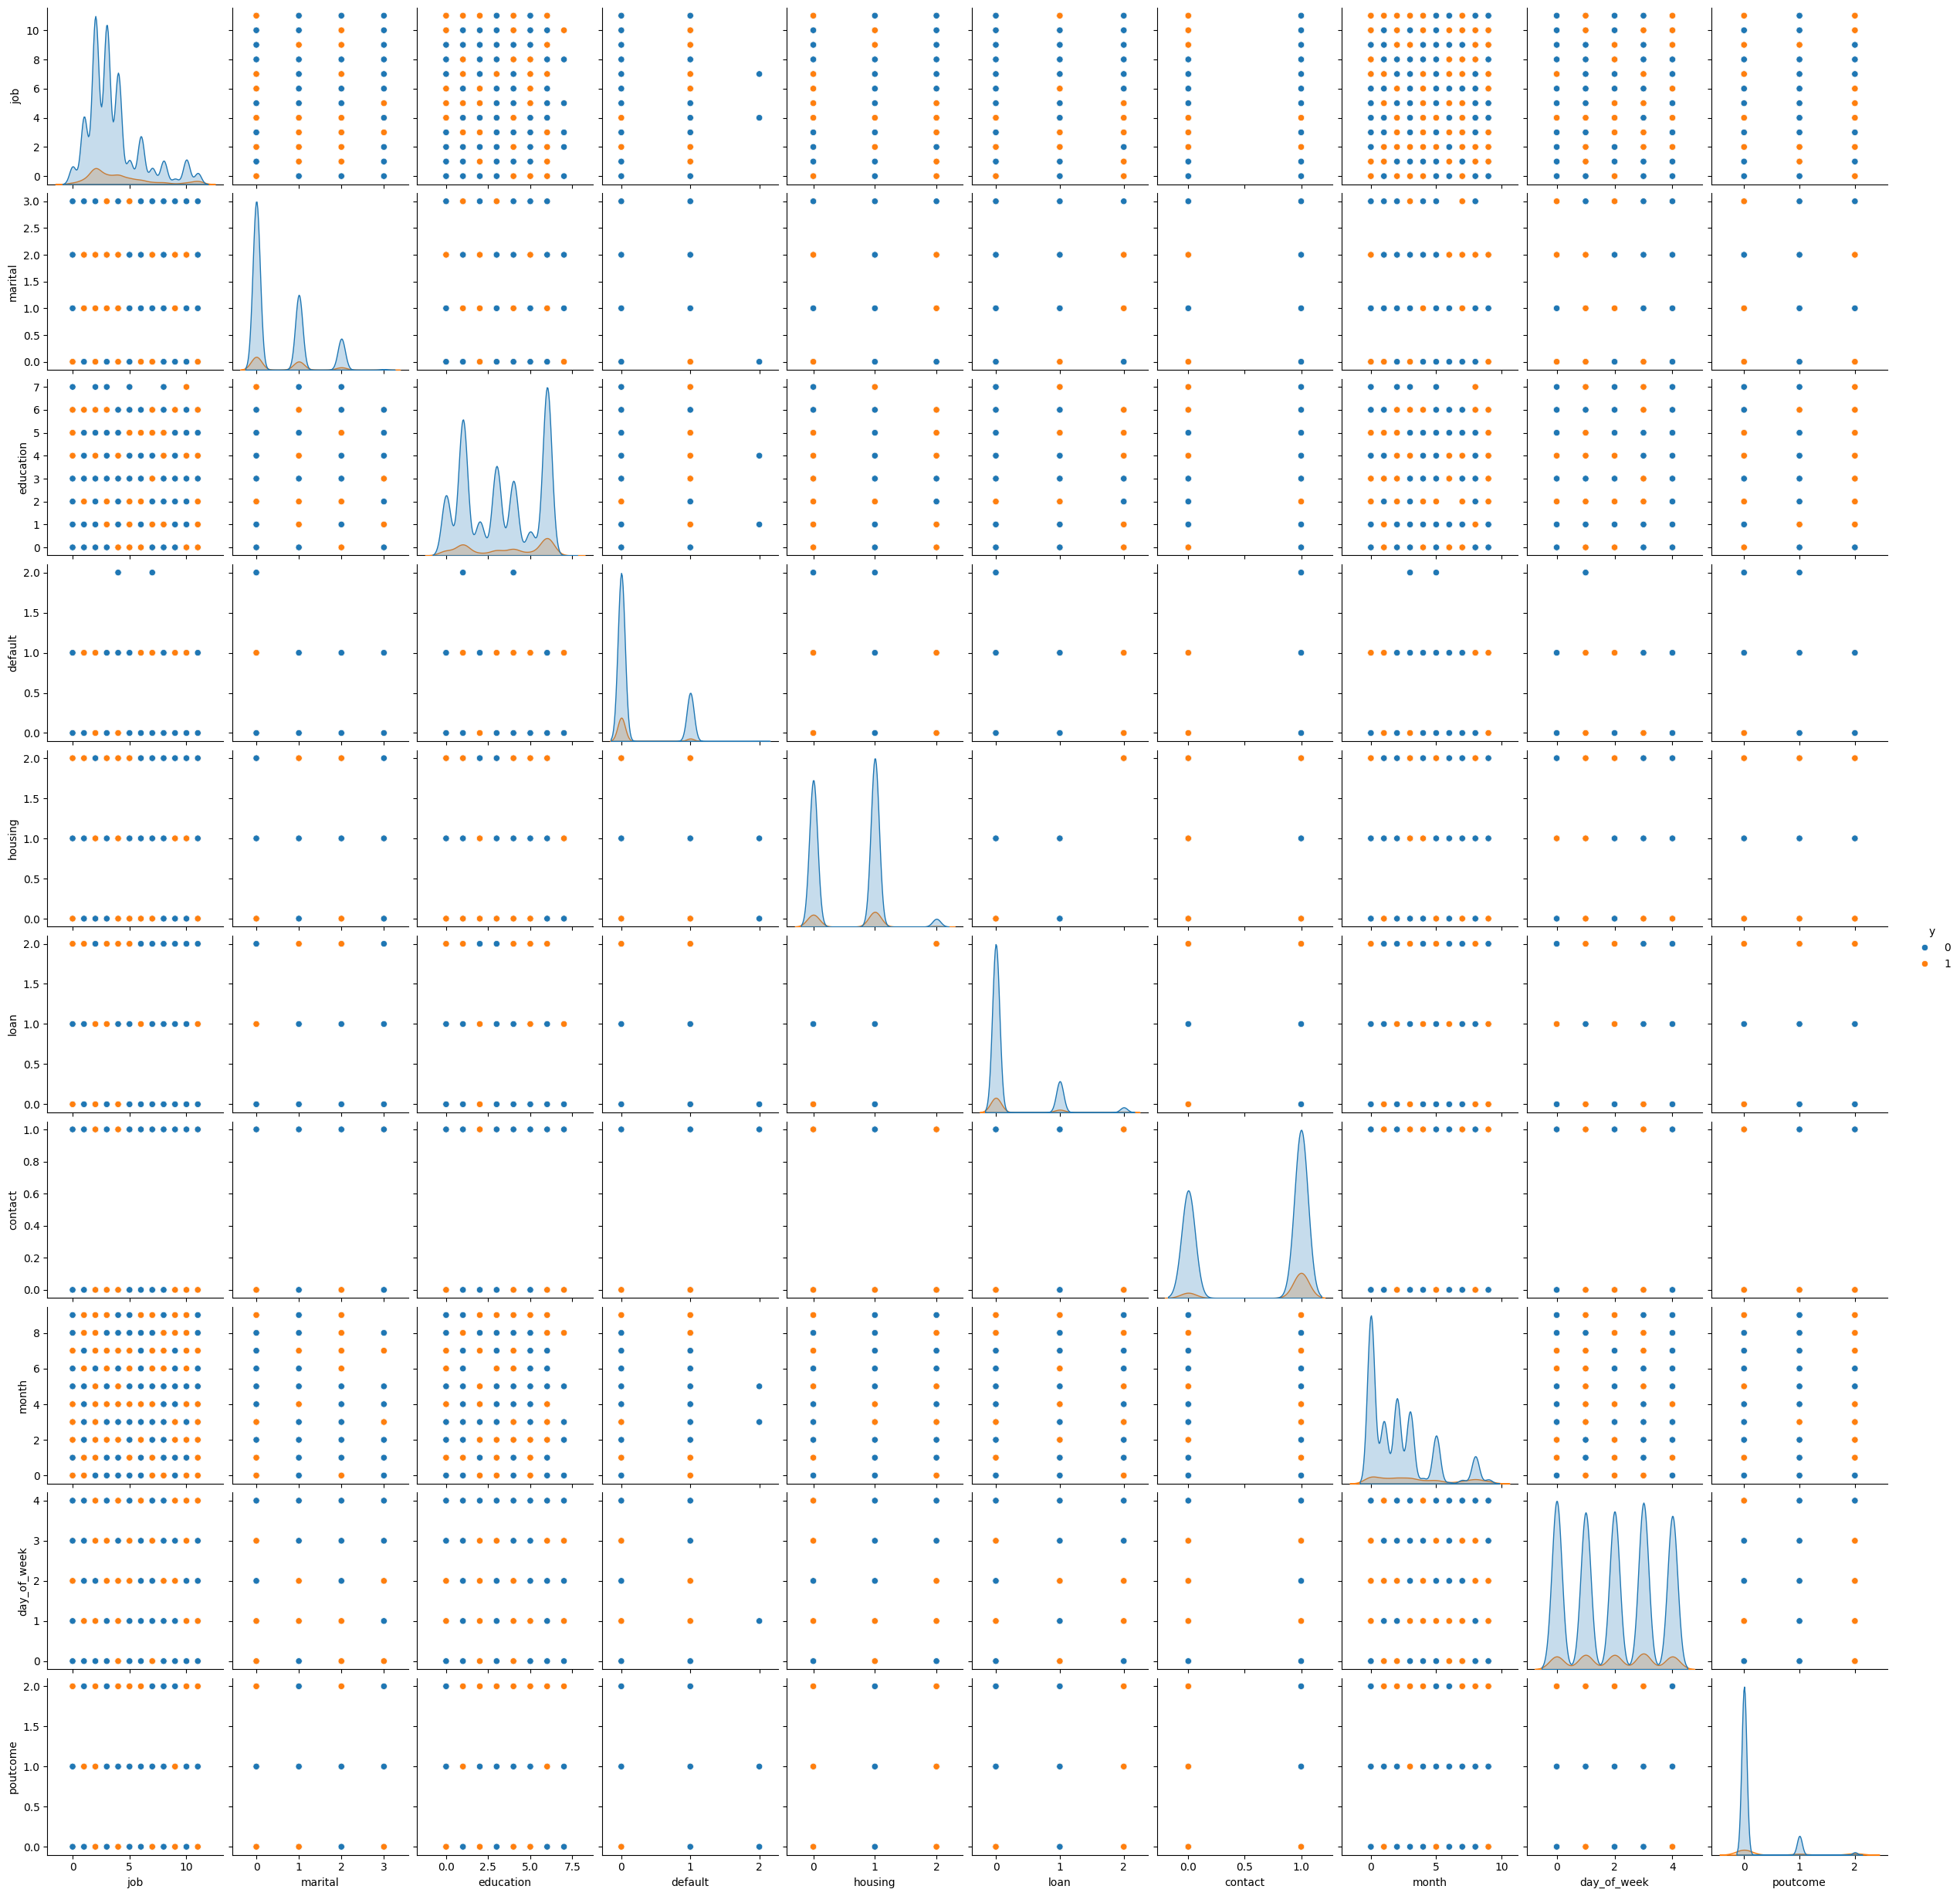

In [7]:
sns.pairplot(df[categorical], hue='y')

plt.show()

#### **Figure 2.**
Next we will compare the numerical continuous variables with themselves and the target variable.

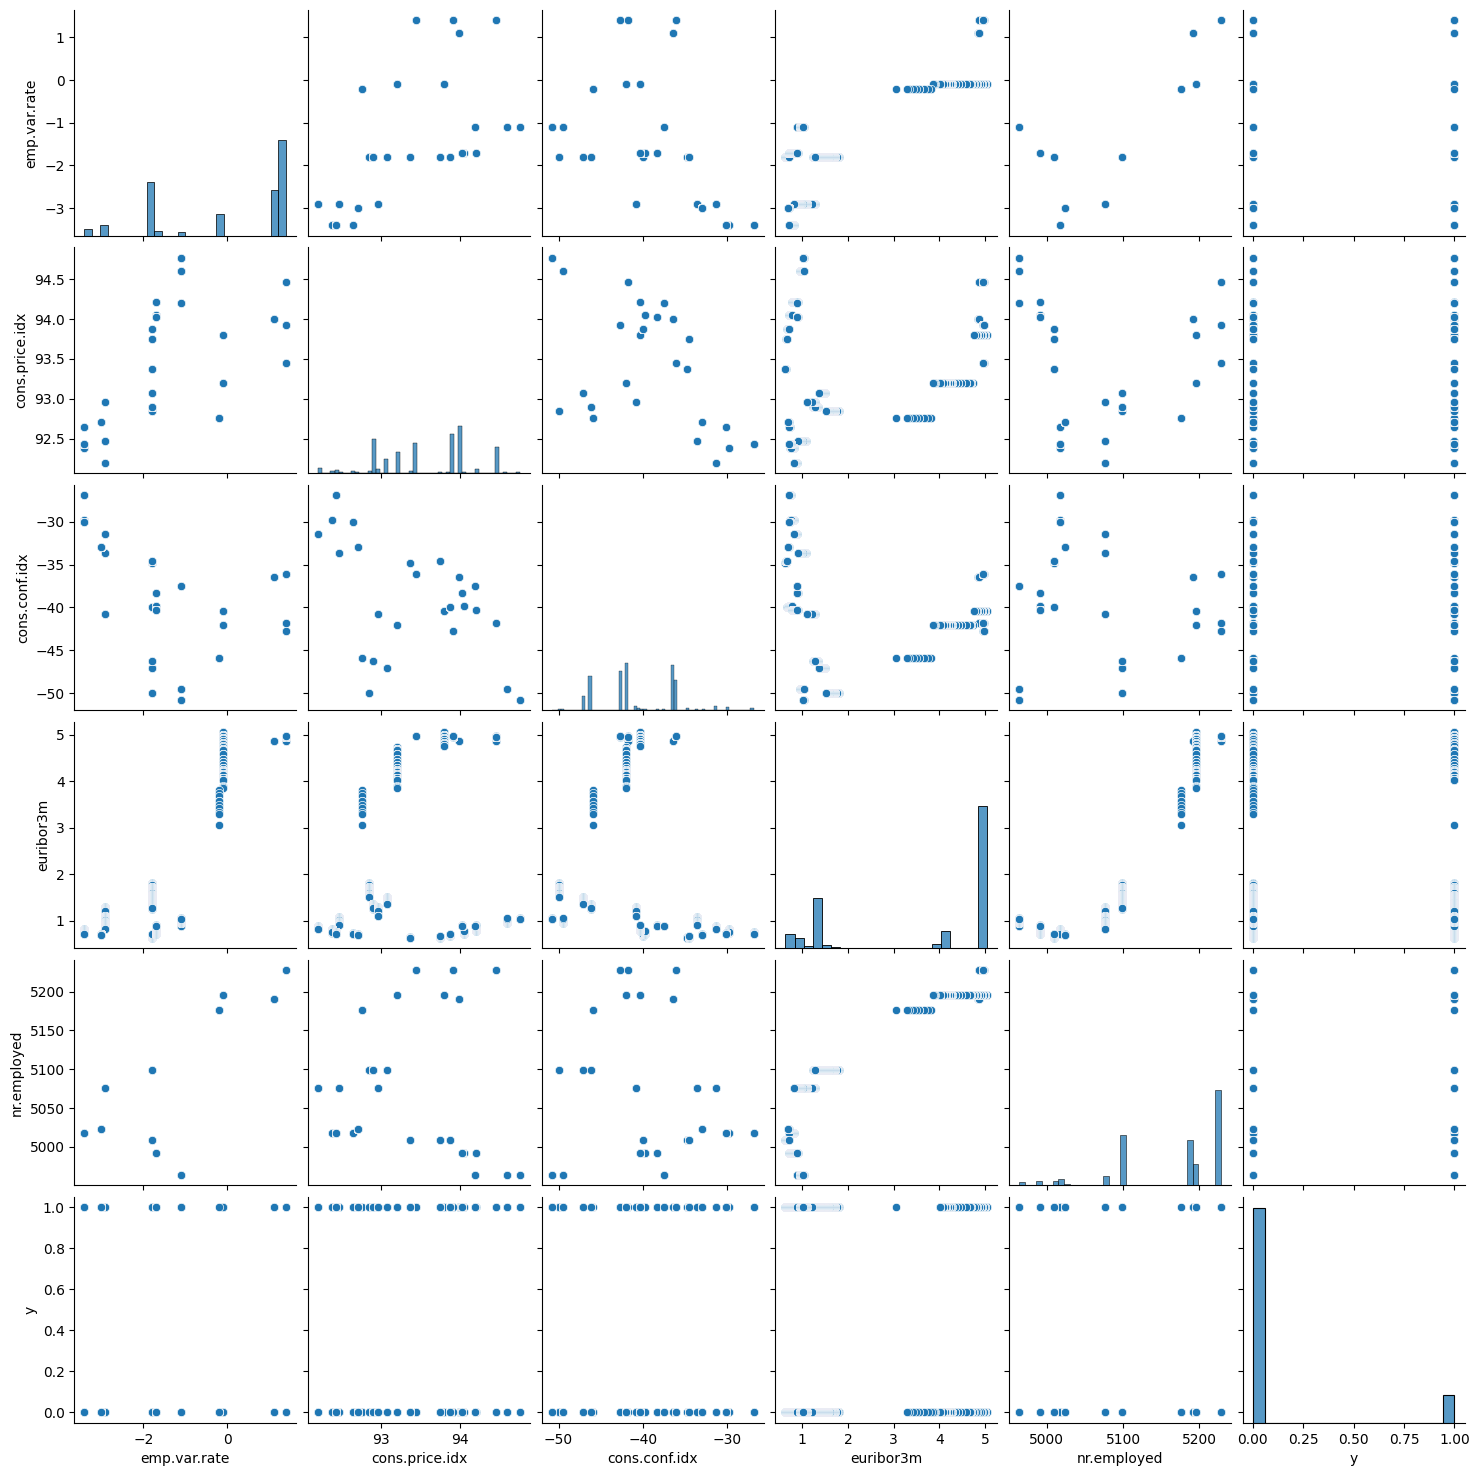

In [8]:
sns.pairplot(df[num_continuous+['y']])
plt.show()

#### **Figure 3.**
We will compare now the numerical discrete variables with themselves and the target variable.

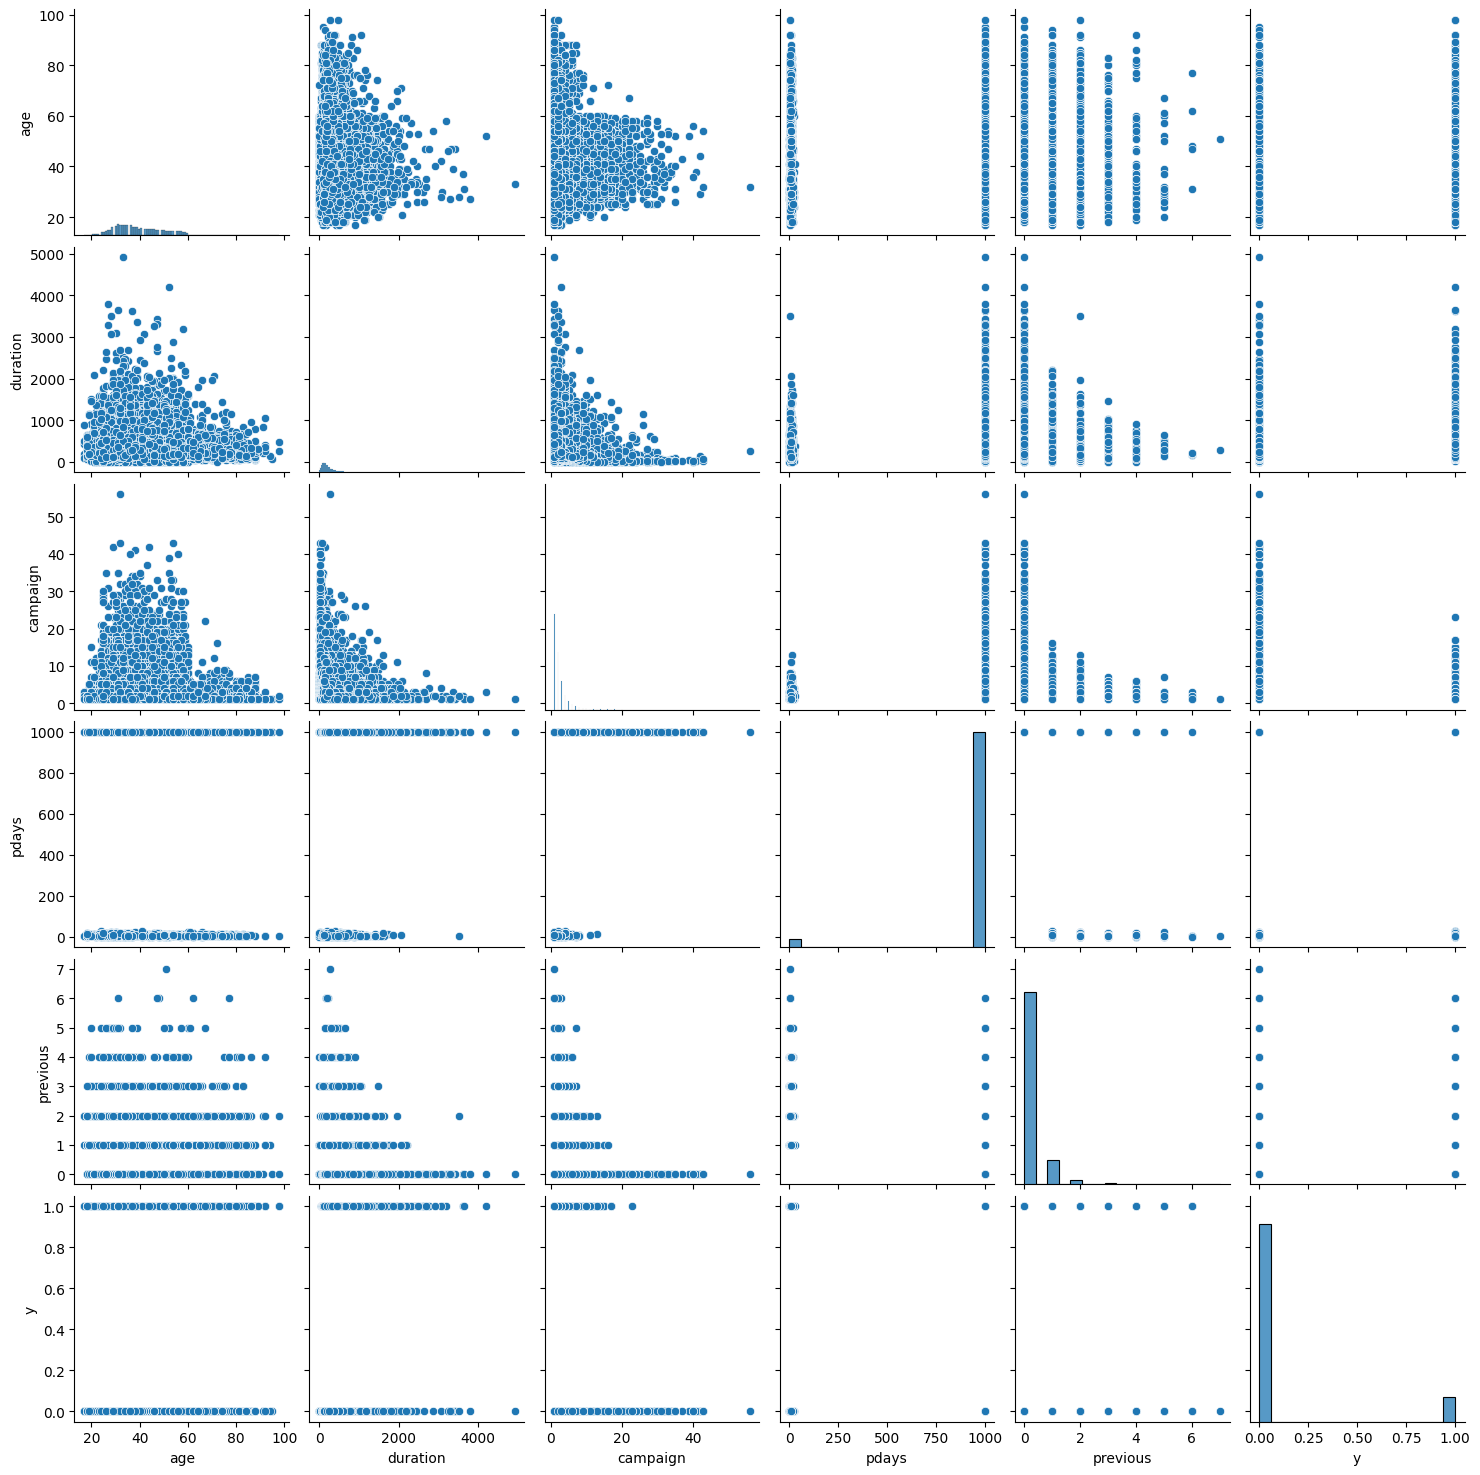

In [9]:
sns.pairplot(df[num_discrete+['y']])
plt.show()

#### **Figure 4.**
At last we will check the correlation coefficients between all the variables using the spearman method.

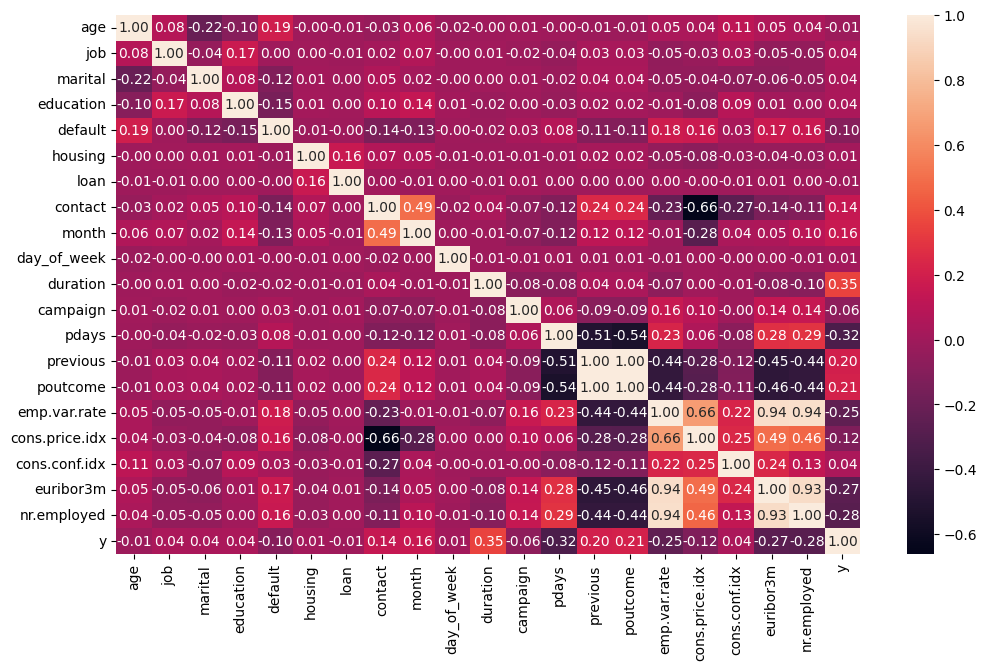

In [10]:
fig = plt.figure(figsize=(12,7))
sns.heatmap(df.corr('spearman'), annot=True, fmt='.2f')
plt.show()

#### **Figure 5.**

We wil check the boxplots for each variable to look wor outliers and have a grasp of the distribution of the data 

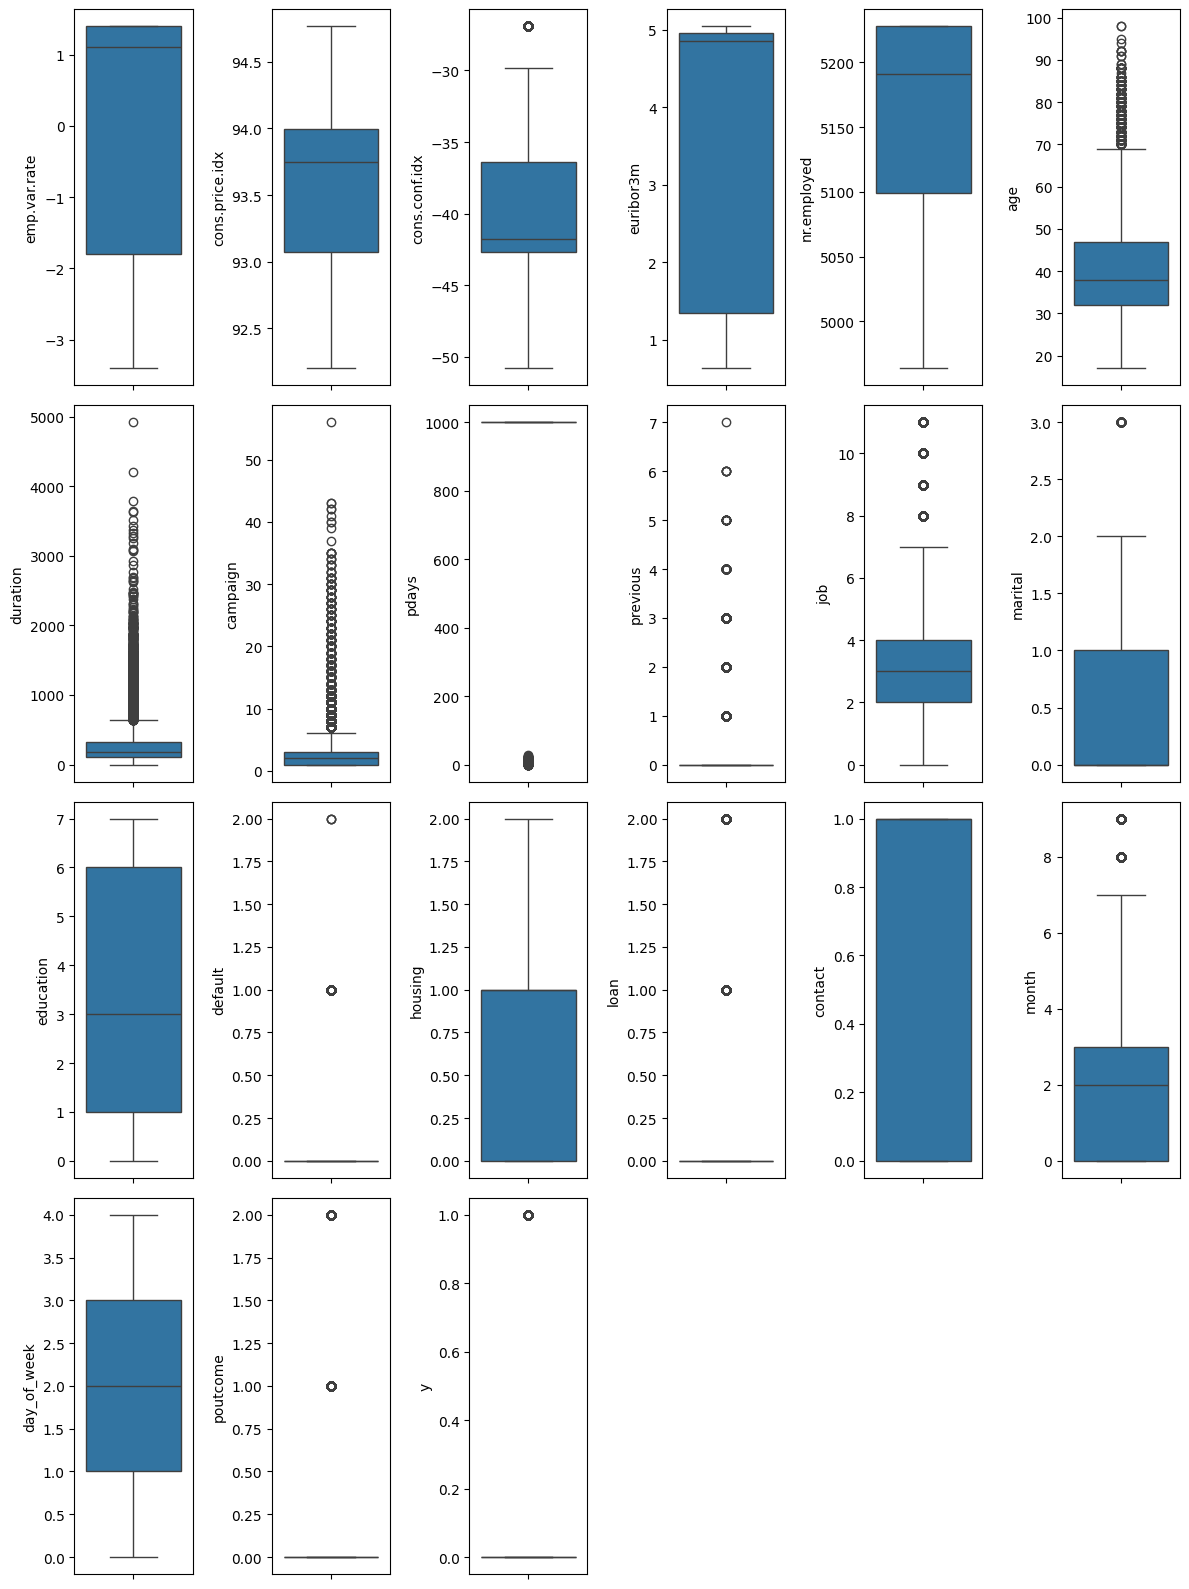

In [11]:
values_to_graph = num_continuous+num_discrete+categorical

ncols = 6
nrows = ceil(len(values_to_graph)/ncols)
sizein = 4
width = sizein*ncols*0.5
height = sizein*nrows

fig = plt.figure(figsize=(width,height))
ax=[]

for i, column in enumerate(values_to_graph):
    new_ax = fig.add_subplot(nrows,ncols,i+1)
    ax.append(new_ax)
    new_ax
    sns.boxplot(df[column],ax=ax[i])

plt.tight_layout()
plt.show()

#### **Figure 6.**

Summary statistics of the continuous variables.

In [52]:
df[num_continuous].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,0.081921,93.575714,-40.502865,3.621294,5167.035156
std,1.570883,0.578840,4.627860,1.734437,72.251343
min,-3.400000,92.200996,-50.799999,0.634000,4963.600098
25%,-1.800000,93.074997,-42.700001,1.344000,5099.100098
50%,1.100000,93.749001,-41.799999,4.857000,5191.000000
75%,1.400000,93.994003,-36.400002,4.961000,5228.100098
max,1.400000,94.766998,-26.900000,5.045000,5228.100098


#### **Figure 7.**

Summary statistics of the continuous variables.

In [50]:
df[num_discrete].describe()

,age,duration,campaign,pdays,previous
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013
std,10.42068,259.305321,2.770318,186.937102,0.494964
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


#### **Figure 8.**

Summary statistics of the continuous variables.

In [51]:
df[categorical].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.169953,0.112663
std,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.455811,0.316184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


### Data exploration analysis

From the plots we cannot detect obvious linear correlations

In [12]:
x = df.drop('y',axis=1, inplace=False)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

scaled_x_train = pd.DataFrame(scaled_x_train,columns=x.columns,index=x_train.index)
scaled_x_test = pd.DataFrame(scaled_x_test,columns=x.columns,index=x_test.index)

scaled_x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12346,0.148148,0.909091,0.000000,0.285714,0.0,0.5,0.5,0.0,0.222222,1.00,0.058154,0.036364,1.0,0.0,0.0,1.000000,0.669135,0.338912,0.980503,1.000000
8564,0.407407,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.111111,0.50,0.036194,0.090909,1.0,0.0,0.0,1.000000,0.882306,0.376569,0.958966,1.000000
21417,0.148148,0.181818,0.333333,0.857143,0.0,0.0,0.0,1.0,0.333333,0.25,0.020943,0.054545,1.0,0.0,0.0,1.000000,0.484413,0.615063,0.981410,1.000000
3315,0.222222,0.181818,0.333333,0.857143,0.0,0.0,0.0,0.0,0.000000,0.75,0.027450,0.000000,1.0,0.0,0.0,0.937500,0.698755,0.602510,0.958059,0.859735
33236,0.283951,0.272727,0.333333,0.142857,0.5,0.0,0.0,1.0,0.000000,0.25,0.084994,0.000000,1.0,0.0,0.0,0.333333,0.269681,0.192469,0.148946,0.512287


In [13]:
selection_model = SelectKBest(chi2,k=10)
selection_model.fit(scaled_x_train,y_train)
ix=selection_model.get_support()
x_train_selected = pd.DataFrame(selection_model.transform(scaled_x_train),columns=scaled_x_train.columns.values[ix])
x_test_selected = pd.DataFrame(selection_model.transform(scaled_x_test),columns=scaled_x_test.columns.values[ix])

print(x_train_selected.columns)

Index(['default', 'contact', 'month', 'duration', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'euribor3m', 'nr.employed'],
      dtype='object')


In [15]:
model = LogisticRegression()
model.fit(x_train_selected,y_train)
y_pred = model.predict(x_test_selected)
accuracy_score(y_test,y_pred)

0.90165128703254

In [17]:
def warn(*args,**kwargs):
    pass

hyperparams ={
    'C':[0.001,0.01,0.1,1],
    'penalty':['l1','l2','elasticnet',None],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

grid = GridSearchCV(model,hyperparams,scoring='accuracy',cv=5)
warnings.warn=warn

grid.fit(x_train_selected,y_train)

print(f'Adjusted hyperparameters: {grid.best_params_}')

Adjusted hyperparameters: {'C': 1, 'penalty': None, 'solver': 'sag'}


In [18]:
adjusted_model = grid.best_estimator_
y_adjusted_pred = adjusted_model.predict(x_test_selected)

accuracy_score(y_test,y_adjusted_pred)

0.9021369596891695

In [19]:
from pickle import dump

model_filename = '../models/logistic_regression_C_{C}_penalty_{penalty}_solver_{solver}.sav'
dump(adjusted_model,open(model_filename.format(**grid.best_params_),'wb'))